In [1]:
import os

import datetime as dt
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import configparser

import modules.load_data as ld
from modules.modules_FIG03 import *

# paths
config = configparser.ConfigParser()
config.read("ConfigFile.ini")
pf = config['PATHS']['datasets']


#CAMSra data
camsra_fname_2015 = os.path.join(pf,"CAMSRA/cams-ra_2015*_sfc.nc")
camsra_fname_all = os.path.join(pf,"CAMSRA/cams-ra_*_sfc.nc")
#TCARS data
TCARS_fname_2015 = os.path.join(pf,"TCARS_spectral_aerosol_props_2015.nc")
TCARS_fname_all = os.path.join(pf,"TCARS_spectral_aerosol_props_*.nc")



## AOD CAMSRA vs T-CARS
This Figure shows the comparison of spectral AOD directly from the CAMSRA dataset acquired from Copernicus ADS compared to the T-CARS calculation of AOD from CAMSRA aerosol mass mixing ratios.

Plotting takes very long!

**This Figure is not shown in the paper.**

In [2]:
def make_plot(fname,CAOD,TAOD):
    fig,axs = plt.subplots(5,2,figsize=(10,14.5))#(12,16)
    fig = make_plotqq(fig=fig,
                    X=CAOD.values[:,:,:,0].flatten(),
                    Y=TAOD.values[:,:,:,0].flatten(),
                    ax=axs[0,0],ax2=axs[0,1],
                    W='counts', # histogram of number observations
                    title='(a)',
                    title2='(b)',
                    Xlabel='CAMS RA',
                    Ylabel='T-CARS',
                    Wlabel='',#Count [-]
                    Value='AOD(469nm) [-]',
                    lalpha=0.7,
                    xlim=(-3,3),
                    xlim2=(0,0.4),
                    ylim=(-0.025,0.025),
                    qqplot=False,
                    percentiles=np.arange(0.5,100,0.5),
                    histplot=True,
                    metrics_loc=1)
    print('1')
    fig = make_plotqq(fig=fig,
                    X=CAOD.values[:,:,:,1].flatten(),
                    Y=TAOD.values[:,:,:,1].flatten(),
                    ax=axs[1,0],ax2=axs[1,1],
                    W='counts', # histogram of number observations
                    title='(c)',
                    title2='(d)',
                     Xlabel='CAMS RA',
                    Ylabel='T-CARS',
                    Wlabel='',#Count [-]
                    Value='AOD(550nm) [-]',
                      lalpha=0.7,
                    xlim=(-3,3),
                    xlim2=(0,0.4),
                    ylim=(-0.025,0.025),
                    qqplot=False,
                    percentiles=np.arange(0.5,100,0.5),
                    histplot=True,
                    metrics_loc=1)
    print('2')
    fig = make_plotqq(fig=fig,
                    X=CAOD.values[:,:,:,2].flatten(),
                    Y=TAOD.values[:,:,:,2].flatten(),
                    ax=axs[2,0],ax2=axs[2,1],
                    W='counts', # histogram of number observations
                    title='(e)',
                    title2='(f)',
                    Xlabel='CAMS RA',
                    Ylabel='T-CARS',
                    Wlabel='',#Count [-]
                    Value=r'AOD(670nm) [-]',
                      lalpha=0.7,
                    xlim=(-3,3),
                    xlim2=(0,0.4),
                    ylim=(-0.025,0.025),
                    qqplot=False,
                    percentiles=np.arange(0.5,100,0.5),
                    histplot=True,
                    metrics_loc=1)
    print('3')
    fig = make_plotqq(fig=fig,
                    X=CAOD.values[:,:,:,3].flatten(),
                    Y=TAOD.values[:,:,:,3].flatten(),
                    ax=axs[3,0],ax2=axs[3,1],
                    W='counts', # histogram of number observations
                    title='(g)',
                    title2='(h)',
                    Xlabel='CAMS RA',
                    Ylabel='T-CARS',
                    Wlabel='',#Count [-]
                    Value=r'AOD(865nm) [-]',
                      lalpha=0.7,
                    xlim=(-3,3),
                    xlim2=(0,0.4),
                    ylim=(-0.025,0.025),
                    qqplot=False,
                    percentiles=np.arange(0.5,100,0.5),
                    histplot=True,
                    metrics_loc=1)
    print('4')
    fig = make_plotqq(fig=fig,
                    X=CAOD.values[:,:,:,4].flatten(),
                    Y=TAOD.values[:,:,:,4].flatten(),
                    ax=axs[4,0],ax2=axs[4,1],
                    W='counts', # histogram of number observations
                    title='(i)',
                    title2='(j)',
                    Xlabel='CAMS RA',
                    Ylabel='T-CARS',
                    Wlabel='',#Count [-]
                    Value=r'AOD(1240nm) [-]',
                      lalpha=0.7,
                    xlim=(-3,3),
                    xlim2=(0,0.4),
                    ylim=(-0.025,0.025),
                    qqplot=False,
                    percentiles=np.arange(0.5,100,0.5),
                    histplot=True,
                    metrics_loc=1)
    plt.tight_layout()
    print('5')

    # Get the bounding boxes of the axes including text decorations
    r = fig.canvas.get_renderer()
    get_bbox = lambda ax: ax.get_tightbbox(r).transformed(fig.transFigure.inverted())
    bboxes = np.array(list(map(get_bbox, axs.flat)), mtrans.Bbox).reshape(axs.shape)

    #Get the minimum and maximum extent, get the coordinate half-way between those
    ymax = np.array(list(map(lambda b: b.y1, bboxes.flat))).reshape(axs.shape).max(axis=1)
    ymin = np.array(list(map(lambda b: b.y0, bboxes.flat))).reshape(axs.shape).min(axis=1)
    ys = np.c_[ymax[1:], ymin[:-1]].mean(axis=1)

    # Draw a horizontal lines at those coordinates
    for y in ys:
        line = plt.Line2D([0,1],[y,y], transform=fig.transFigure, color="black",linestyle=':',linewidth=1)
        fig.add_artist(line)

    line = plt.Line2D([0.52,0.52],[0,1], transform=fig.transFigure, color="black",linestyle=':',linewidth=1)
    fig.add_artist(line)
    fig.savefig(fname,dpi=300,bbox_inches='tight')


load TCARS dataset
load CAMSRA dataset
make the plot
1
2
3
4
5


/home/jonas/anaconda3/envs/witthuhn2021/lib/python3.7/site-packages/ipykernel_launcher.py:108: FutureWarning: The input object of type 'Bbox' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Bbox', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.


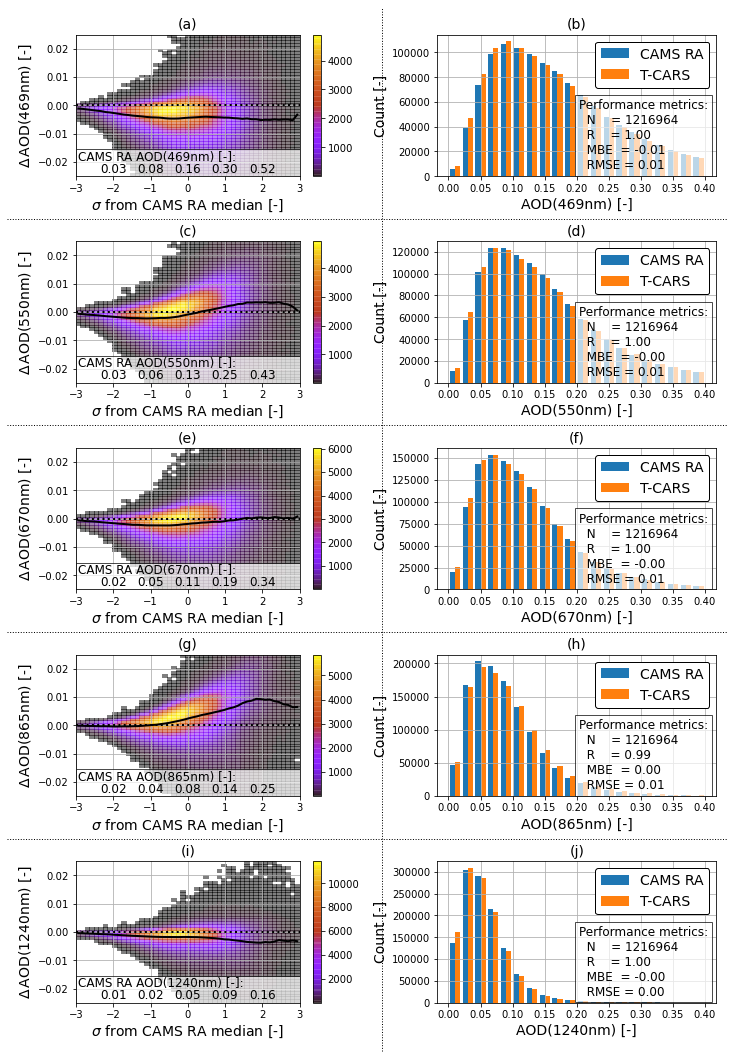

In [21]:
## For all years (takes very long)
print('load TCARS dataset')
TCARS = xr.open_mfdataset(TCARS_fname_all,combine='by_coords')
TCARS = TCARS.resample(time='1D').mean()
TAOD = TCARS.aod.drop_sel(wvl=[469,550,670,865,1240])
TAOD = TAOD.interp(wvl=[469,550,670,865,1240])
TAOD = TAOD.compute()
CAOD = TAOD.copy()*np.nan

print('load CAMSRA dataset')
cams_sfc = xr.open_mfdataset(camsra_fname_all,combine='by_coords')
dropvars = [ var for var in cams_sfc.keys() if var[:3]!='aod' ] 
cams_sfc = cams_sfc.drop_vars(dropvars).compute()
cams_sfc = cams_sfc.resample(time='1D').mean()

CAOD.values[:,:,:,0] = cams_sfc.aod469.values
CAOD.values[:,:,:,1] = cams_sfc.aod550.values
CAOD.values[:,:,:,2] = cams_sfc.aod670.values
CAOD.values[:,:,:,3] = cams_sfc.aod865.values
CAOD.values[:,:,:,4] = cams_sfc.aod1240.values

## make plot
print('make the plot')
make_plot(fname = "Figures/FigXX_CAMSRAvsTCARS_AOD.pdf",CAOD=CAOD,TAOD=TAOD)


load TCARS dataset
load CAMSRA dataset
make the plot
1
2
3
4
5


/home/jonas/anaconda3/envs/witthuhn2021/lib/python3.7/site-packages/ipykernel_launcher.py:108: FutureWarning: The input object of type 'Bbox' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Bbox', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.


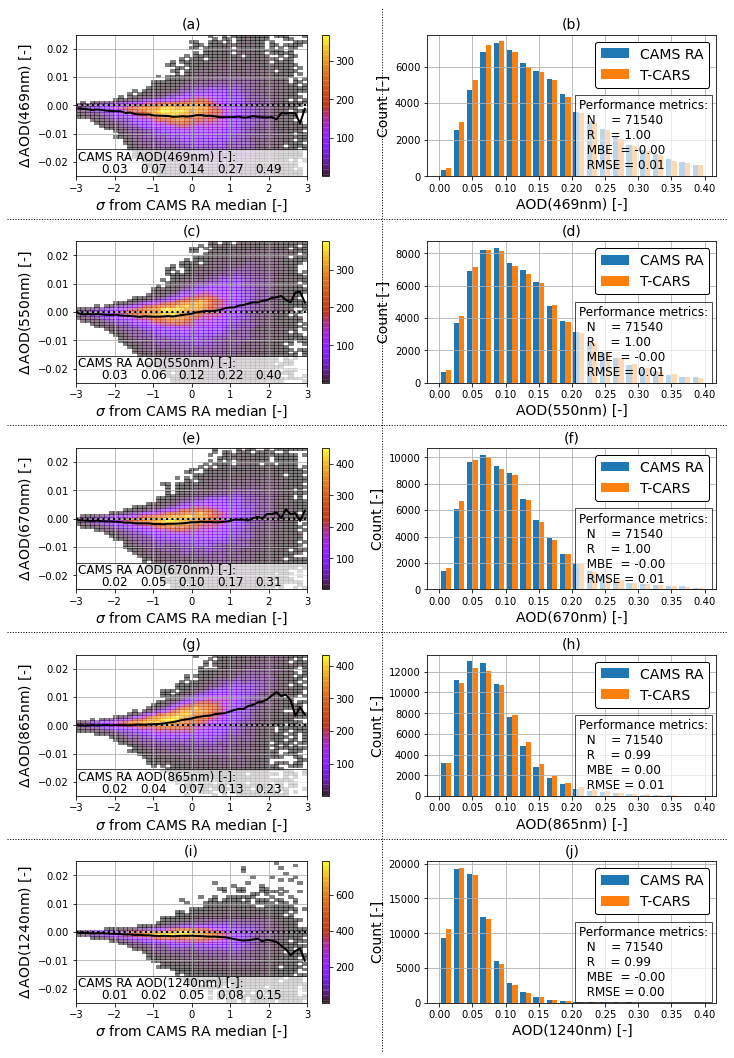

In [19]:
## For 2015
print('load TCARS dataset')
TCARS = xr.load_dataset(TCARS_fname_2015)
TCARS = TCARS.resample(time='1D').mean()
TAOD = TCARS.aod.drop_sel(wvl=[469,550,670,865,1240])
TAOD = TAOD.interp(wvl=[469,550,670,865,1240])
CAOD = TAOD.copy()*np.nan

print('load CAMSRA dataset')
cams_sfc = xr.open_mfdataset(camsra_fname_2015,combine='by_coords')
cams_sfc = cams_sfc.resample(time='1D').mean()
dropvars = [ var for var in cams_sfc.keys() if var[:3]!='aod' ] 
cams_sfc = cams_sfc.drop_vars(dropvars).compute()

CAOD.values[:,:,:,0] = cams_sfc.aod469.values
CAOD.values[:,:,:,1] = cams_sfc.aod550.values
CAOD.values[:,:,:,2] = cams_sfc.aod670.values
CAOD.values[:,:,:,3] = cams_sfc.aod865.values
CAOD.values[:,:,:,4] = cams_sfc.aod1240.values

## make plot
print('make the plot')
make_plot(fname = "Figures/FigXX_CAMSRAvsTCARS_AOD_2015.pdf",CAOD=CAOD,TAOD=TAOD)